In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
from dateutil.parser import parse 


In [21]:
df = pd.read_csv("Downloads/data.csv", index_col= ["tempo"], parse_dates = ["tempo"])

In [22]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,valence,year
tempo,,,,,,,,,,,,,,,,,,
118.469,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,0.7790,1928
83.972,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,0.0767,1928
107.177,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,0.8800,1928
108.003,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,0.7200,1928
62.149,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,0.0693,1928


In [23]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,valence,year
tempo,,,,,,,,,,,,,,,,,,
100.012,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,0.306,2020
128.000,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,0.270,2020
123.700,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,0.153,2020
129.916,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,0.472,2020
80.588,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,60RFlt48hm0l4Fu0JoccOl,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,0.366,2020


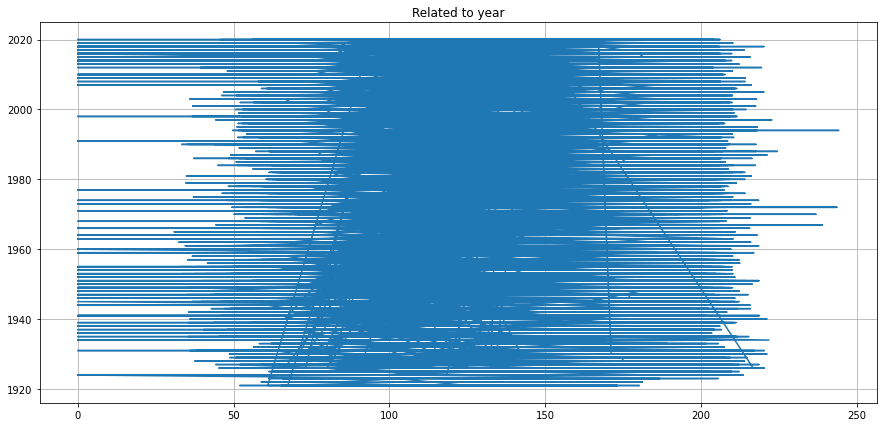

In [26]:
plt.figure(figsize=(15,7))
plt.plot(df.year)
plt.grid(True)
plt.title("Related to year")
plt.show()

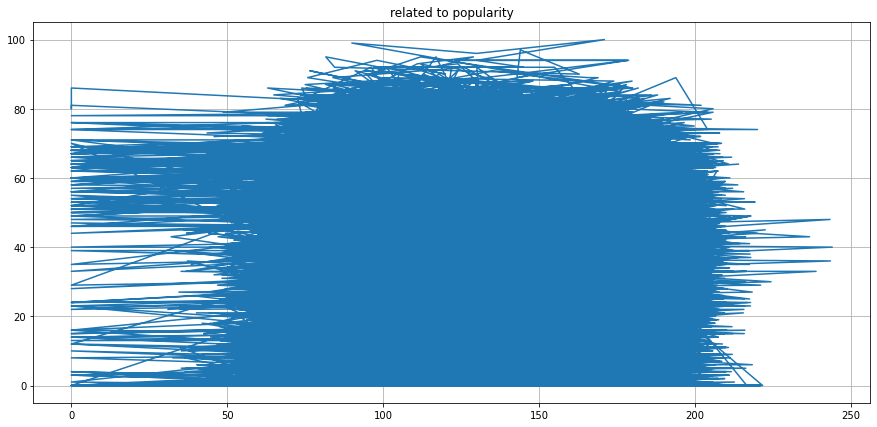

In [28]:
plt.figure(figsize=(15,7))
plt.plot(df.popularity)
plt.grid(True)
plt.title("related to popularity")
plt.show()

In [29]:
from sklearn.metrics import r2_score ,mean_absolute_error , median_absolute_error 

In [32]:
def mean_absolute_percentage(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
df['year'] = [d.year for d in df.year]
df['popularity'] = [d.strftime('%b') for d in df.popularity]

AttributeError: 'int' object has no attribute 'year'

In [42]:
from statsmodels.tsa.stattools import adfuller, kpss

In [44]:
result = adfuller(df.year.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.953301392753356
p-value: 3.0844773241145006e-12
Critial Values:
   1%, -3.4303884878804847
Critial Values:
   5%, -2.861557011117315
Critial Values:
   10%, -2.566779054409048
